In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file="F:\\subset_0_of_S1A_IW_GRDH_1SDV_20150303T004731_20150303T004756_004860_0060E3_4B0D.tif"
img=gdal.Open(file)


In [3]:
data1=img.GetRasterBand(1)
data_2=data1.ReadAsArray()
data_2.shape

(1711, 2053)

In [4]:
data=data_2[0:400,0:400]
var_ref=np.var(data)    #variance of microwave image
print(var_ref)
print(data.shape)
np.array(data)

1340.8463
(400, 400)


array([[120., 146., 113., ..., 106., 106.,  98.],
       [123., 142., 124., ..., 120., 122., 106.],
       [ 88., 109., 136., ..., 115., 110.,  98.],
       ...,
       [169., 137., 104., ..., 123., 124., 101.],
       [174., 139., 107., ..., 135., 131., 104.],
       [162., 155., 119., ..., 117., 116., 111.]], dtype=float32)

In [11]:
def lee_filter(data,kernal_size):
    kernal_size=3
    indexer=kernal_size//2
    padding=np.zeros((data.shape[0]+indexer*2,data.shape[1]+indexer*2))
    padding[indexer:padding.shape[0]-indexer,indexer:padding.shape[1]-indexer]=data
    
    for i in range(indexer,padding.shape[0]-indexer):
        for j in range(indexer,padding.shape[1]-indexer):
            mean_k=np.mean(padding[i-indexer:i+indexer+1,j-indexer:j+indexer+1])
            kernal_var=np.var(padding[i-indexer:i+indexer+1,j-indexer:j+indexer+1])
            Weight=(kernal_var)/((kernal_var)+(var_ref))
            c=padding[i,j]
            padding[i,j]=mean_k+(c-mean_k)*Weight 
    return padding
            
        
    

Text(0.5, 1.0, 'filtered_image')

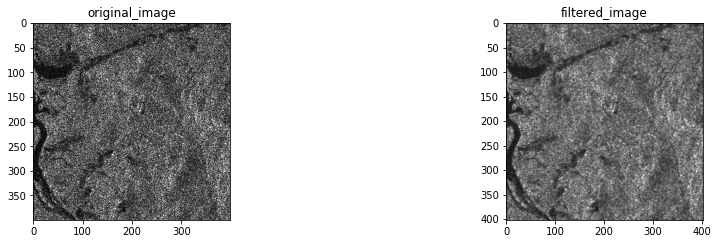

In [12]:

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow((data),Cmap='gray')
plt.title('original_image',fontsize=12)

filt_img=lee_filter(data,3)#lee filter of kernal size 3*3
plt.subplot(133)
plt.imshow(filt_img,Cmap='gray')
plt.title('filtered_image',fontsize=12)